# Importing necessary labrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format='{:.2f}'.format
pd.options.display.max_columns=None
#sns.set_theme(color_codes=True)

In [2]:
# from google.colab import files
# uploaded=files.upload()

# Read Data Set 

In [3]:
df=pd.read_csv(r"https://raw.githubusercontent.com/Spkumar05011702/Python/8ca0ce18df42df8737c0df6f6fc412c774677826/USA%20Real%20Estate%20Dataset/realtor-data.csv")

In [4]:
df.head(2)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.00,2.00,0.12,Adjuntas,Puerto Rico,601.00,920.00,NaN,105000.00
1,for_sale,4.00,2.00,0.08,Adjuntas,Puerto Rico,601.00,1527.00,NaN,80000.00


#Data Preprocessing/Understanding Part

In [5]:
# Calculating missing value % 
check_missing=(df.isnull().sum()/ df.shape[0])*100
check_missing[check_missing>0].sort_values(ascending=False)

prev_sold_date   62.90
acre_lot         25.45
bed              15.41
bath             14.98
house_size       14.70
zip_code          0.09
city              0.03
dtype: float64

In [6]:
df.bed.fillna(df.bed.median(),inplace=True)
df.bath.fillna(df.bath.median(),inplace=True)
df.acre_lot.fillna(df.acre_lot.mean(),inplace=True)
df.house_size.fillna(df.house_size.mean(),inplace=True)

(df.isnull().sum()/ df.shape[0])*100

status            0.00
bed               0.00
bath              0.00
acre_lot          0.00
city              0.03
state             0.00
zip_code          0.09
house_size        0.00
prev_sold_date   62.90
price             0.00
dtype: float64

In [7]:
df.drop(columns=["prev_sold_date","city"],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206000 entries, 0 to 205999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   status      206000 non-null  object 
 1   bed         206000 non-null  float64
 2   bath        206000 non-null  float64
 3   acre_lot    206000 non-null  float64
 4   state       206000 non-null  object 
 5   zip_code    205805 non-null  float64
 6   house_size  206000 non-null  float64
 7   price       206000 non-null  float64
dtypes: float64(6), object(2)
memory usage: 12.6+ MB


In [9]:
df['zip_code']=df['zip_code'].astype('str')

In [10]:
df.head(2)

,status,bed,bath,acre_lot,state,zip_code,house_size,price
0,for_sale,3.00,2.00,0.12,Puerto Rico,601.0,920.00,105000.00
1,for_sale,4.00,2.00,0.08,Puerto Rico,601.0,1527.00,80000.00


In [11]:
def unique_val(df):
  cat=df.select_dtypes(include="object").nunique().sort_values(ascending = False).index
  ndf=pd.DataFrame()
  for i in cat:
    ndf[f'{i}']=pd.Series(df[f'{i}'].unique())
  ndf.replace(np.nan,"",inplace=True)
  return ndf.T

In [12]:
df.select_dtypes(include="object").describe()

,status,state,zip_code
count,206000,206000,206000
unique,2,12,1012
top,for_sale,Massachusetts,2118.0
freq,205326,153666,3551


In [13]:
unique_val(df).T.head(20)

,zip_code,state,status
0,601.0,Puerto Rico,for_sale
1,795.0,Virgin Islands,ready_to_build
2,731.0,Massachusetts,
3,680.0,Connecticut,
4,612.0,New Hampshire,
5,639.0,Vermont,
6,730.0,New Jersey,
7,670.0,New York,
8,662.0,South Carolina,
9,669.0,Tennessee,


In [14]:
df.select_dtypes(exclude="object").describe()

,bed,bath,acre_lot,house_size,price
count,206000.00,206000.00,206000.00,206000.00,206000.00
mean,3.45,2.53,8.62,2233.76,872960.10
std,2.48,2.71,543.47,3877.50,1448204.43
min,1.00,1.00,0.00,100.00,1.00
25%,2.00,2.00,0.19,1234.00,249900.00
50%,3.00,2.00,0.77,1980.00,524900.00
75%,4.00,3.00,8.62,2440.00,890000.00
max,99.00,198.00,100000.00,1450112.00,60000000.00


In [15]:
cat_var=list(df.select_dtypes(include="object").columns)
num_var=list(df.select_dtypes(exclude="object").columns)

In [16]:
df.select_dtypes(include="object").nunique()

status         2
state         12
zip_code    1012
dtype: int64

#Checking Outliers and remove using IQR

In [17]:
cols=list(df.describe(include=[np.number]).T.index)
Outlier={}
cols

['bed', 'bath', 'acre_lot', 'house_size', 'price']

In [18]:
for col in cols:
  q1,q3=np.percentile(df[col],q=(25,75))
  iqr=q3-q1
  lx=q1-1.5*iqr
  ux=q3+1.5*iqr
  outlier_count= len(df[(df[col]<lx) | (df[col]>ux)])
  #ndf=df[(df[col]>=lx) & (df[col]<=ux)]
  print(f"{col}: q1={round(q1,2)} - q3={round(q3,2)} - iqr={round(iqr,2)} - lx={round(lx,2)} - ux={round(ux,2)}")
  lx,ux=0,0
  if outlier_count>0:
    Outlier[col]=outlier_count

bed: q1=2.0 - q3=4.0 - iqr=2.0 - lx=-1.0 - ux=7.0
bath: q1=2.0 - q3=3.0 - iqr=1.0 - lx=0.5 - ux=4.5
acre_lot: q1=0.19 - q3=8.62 - iqr=8.43 - lx=-12.45 - ux=21.26
house_size: q1=1234.0 - q3=2440.0 - iqr=1206.0 - lx=-575.0 - ux=4249.0
price: q1=249900.0 - q3=890000.0 - iqr=640100.0 - lx=-710250.0 - ux=1850150.0


In [19]:
if len(Outlier)==0:
  print("No outliers found")
else:
  for col,counts in Outlier.items():
    print(f"Column '{col}' has {counts} outliers")

Column 'bed' has 7634 outliers
Column 'bath' has 14619 outliers
Column 'acre_lot' has 5015 outliers
Column 'house_size' has 15003 outliers
Column 'price' has 19290 outliers


### Remove Outliers using IQR


In [20]:
# define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# specify the columns to remove outliers from
columns_to_check = ['bed', 'bath', 'acre_lot', 'house_size']

# call the function to remove outliers using IQR
df_clean = remove_outliers_iqr(df, columns_to_check)

# print the resulting dataframe
df_clean.head()

,status,bed,bath,acre_lot,state,zip_code,house_size,price
0,for_sale,3.00,2.00,0.12,Puerto Rico,601.0,920.00,105000.00
1,for_sale,4.00,2.00,0.08,Puerto Rico,601.0,1527.00,80000.00
2,for_sale,2.00,1.00,0.15,Puerto Rico,795.0,748.00,67000.00
3,for_sale,4.00,2.00,0.10,Puerto Rico,731.0,1800.00,145000.00
4,for_sale,6.00,2.00,0.05,Puerto Rico,680.0,2233.76,65000.00


In [21]:
df=df_clean

# Correlation Heatmap

<ipython-input-22-dd19e6a091f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(method='pearson'),fmt=".2g",annot=True)


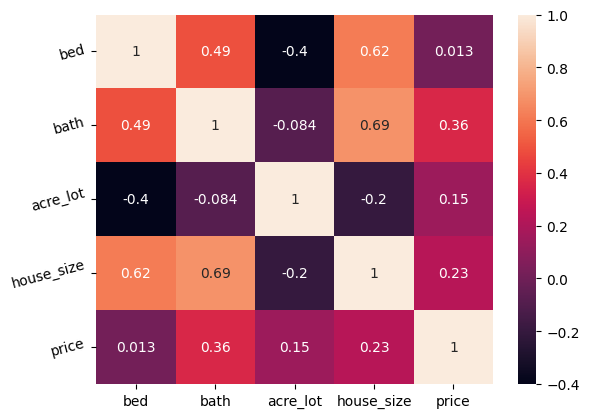

In [22]:
sns.heatmap(data=df.corr(method='pearson'),fmt=".2g",annot=True)
plt.yticks(rotation=15)
plt.show()

#Exploratory data Analysis

In [23]:
cat_var.pop(2)

'zip_code'

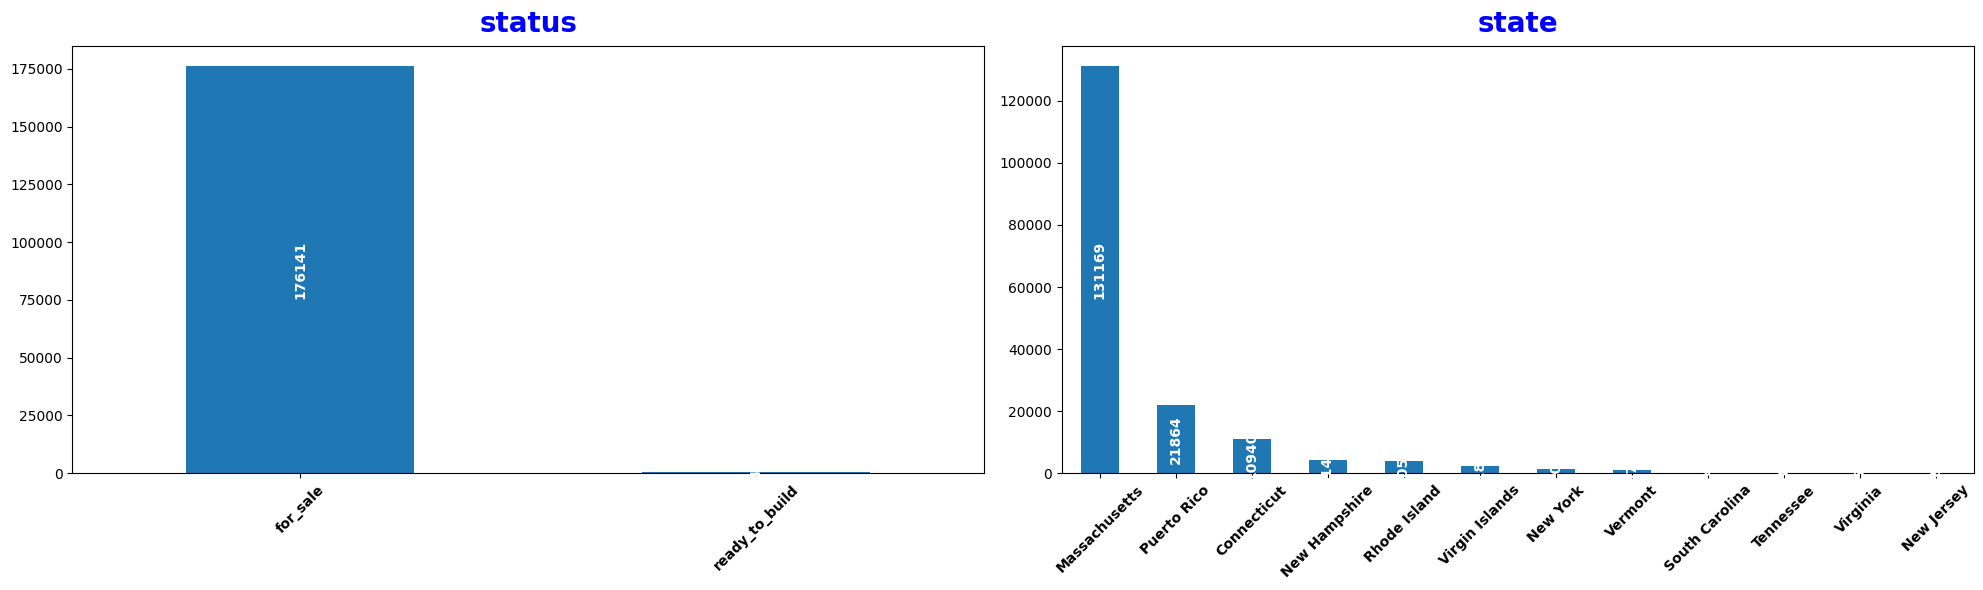

In [24]:
cat_var_b=cat_var
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
axs=axs.flatten()

for i,var in enumerate(cat_var_b):
  ax=df[f'{var}'].value_counts().plot(kind='bar',ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),fontweight='bold',rotation=45)
  axs[i].set_title(f"{var}",pad=10,fontweight='bold',fontsize=20,color='b')
  for container in ax.containers:
    container.datavalues
    ax.bar_label(container,color='white',rotation=90,label_type='center',fontweight='bold')
# adjust spacing between subplots
fig.tight_layout()
plt.show()

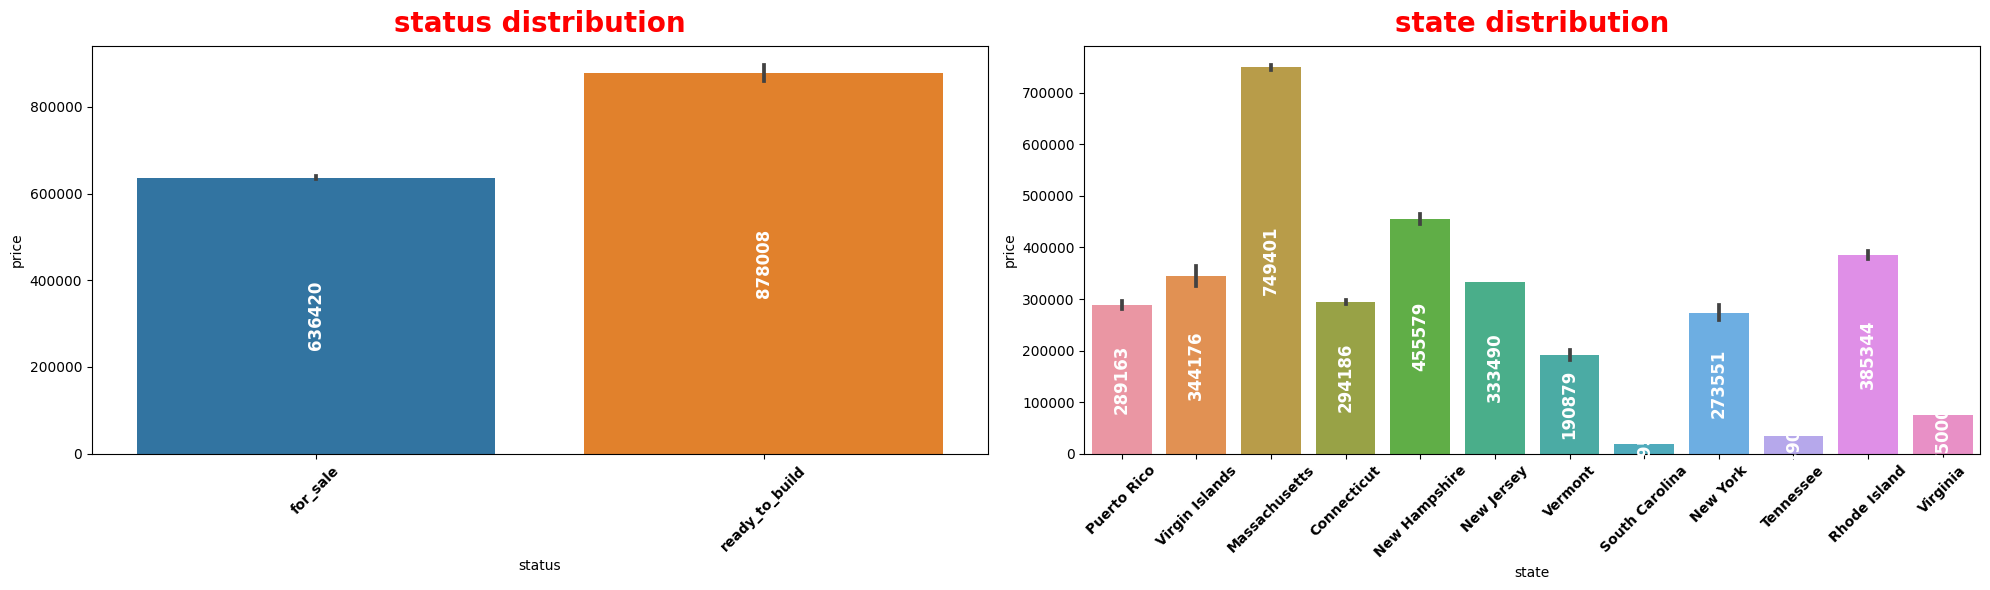

In [25]:
# create figure and axis
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
axs=axs.flatten()
# creating barplot for each vategorical variable
for i,var in enumerate(cat_var):
  ax=sns.barplot(x=var,y=df['price'],data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45,fontweight='bold')
  axs[i].set_title(f"{var} distribution",pad=10,fontweight='bold',fontsize=20,color='r')
  for container in ax.containers:
    container.datavalues
    ax.bar_label(container,color='white',rotation=90,label_type='center',fontweight='bold',fontsize=12)
# adjust spacing between subplots
fig.tight_layout()
plt.show()

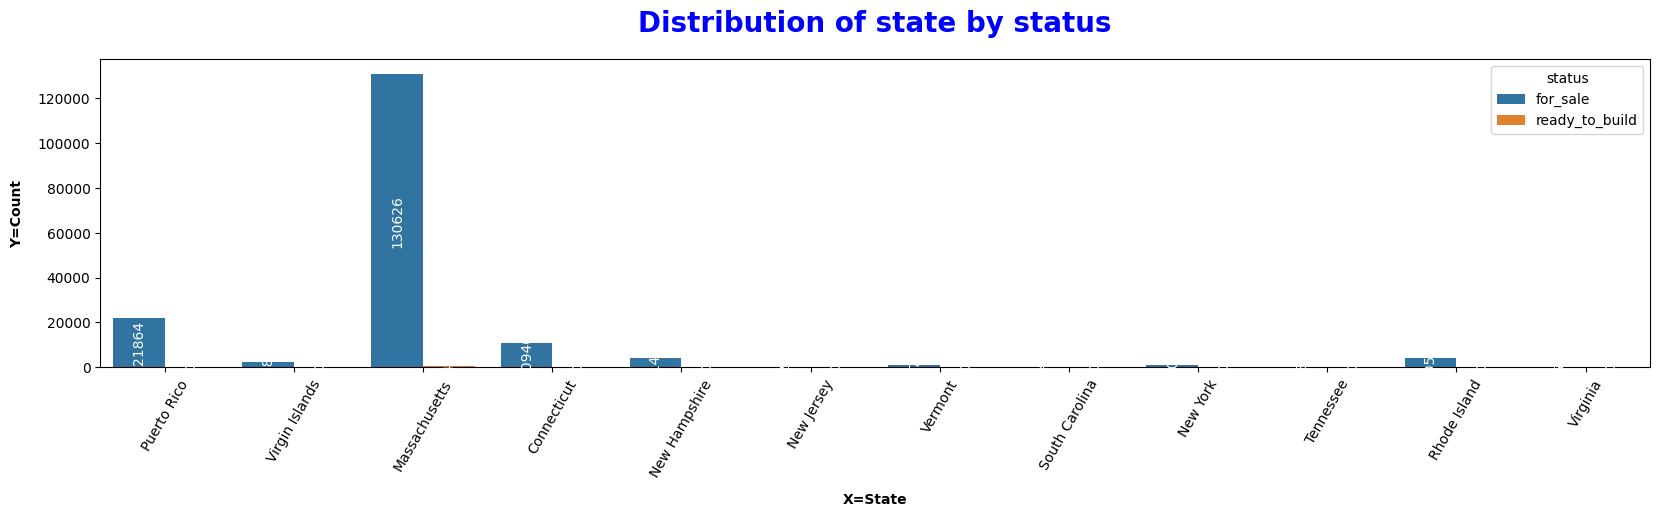

In [26]:
plt.figure(figsize=(20,4))
ax=sns.countplot(data=df,x=df['state'],hue=df['status'])
plt.xticks(rotation=60)
plt.title("Distribution of state by status",weight='bold', pad=20,color='b',fontsize=20)
plt.xlabel("X=State",labelpad=10,fontweight='bold')
plt.ylabel("Y=Count",labelpad=10,fontweight='bold')
for container in ax.containers:
    container.datavalues
    ax.bar_label(container,color='white',rotation=90,label_type='center')
plt.show()

In [27]:
num_var.pop(4)

'price'

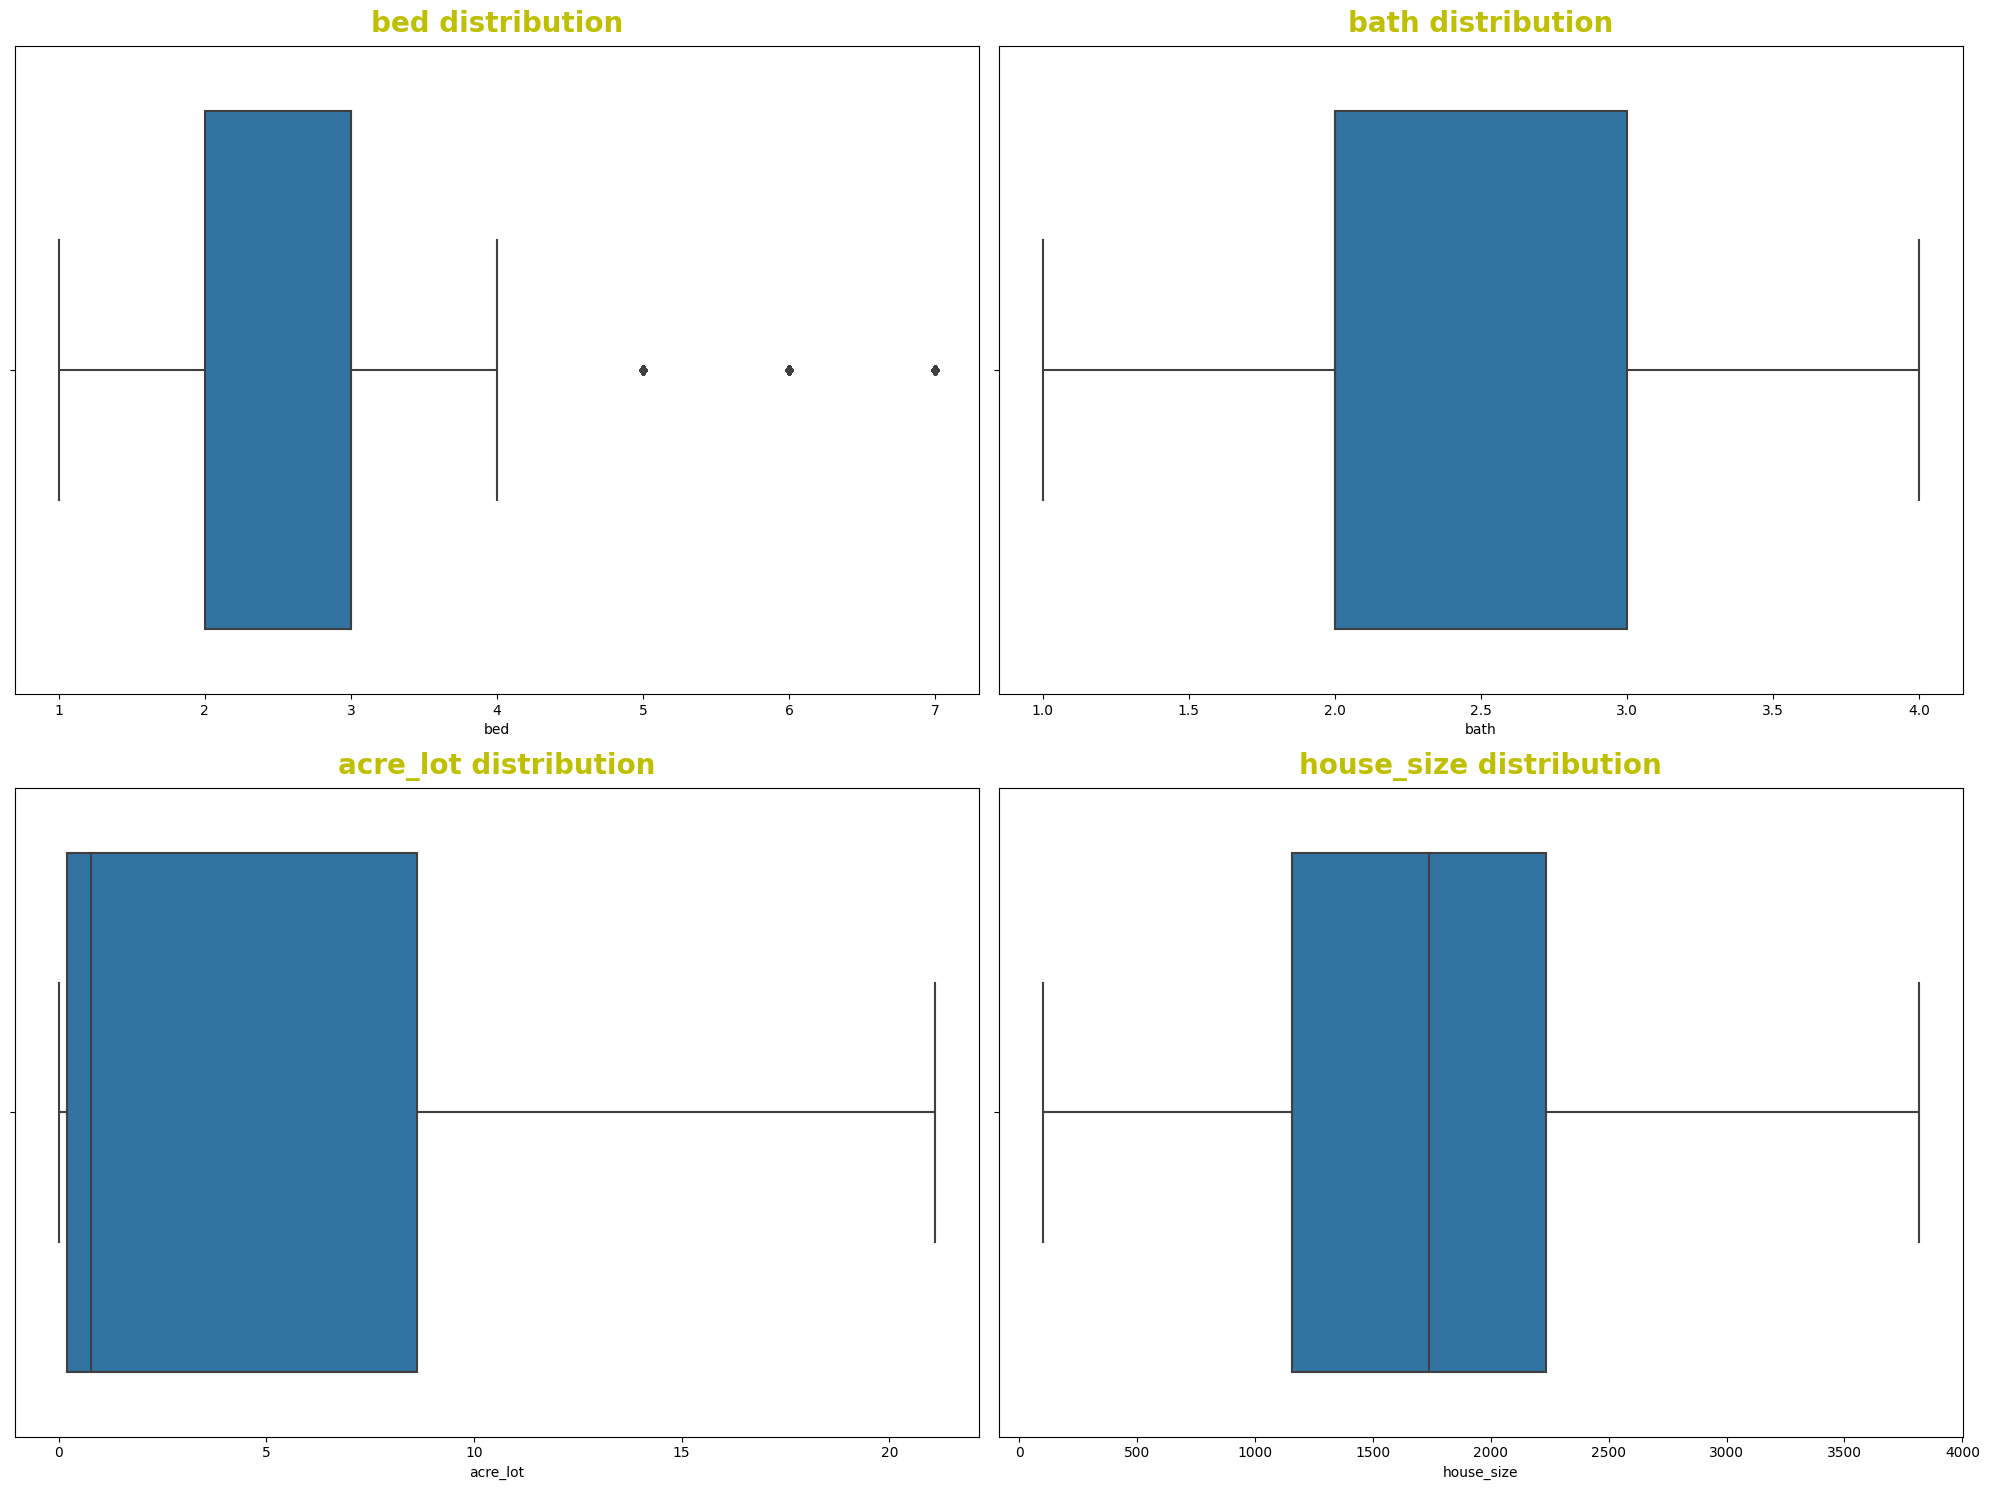

In [28]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(20,15))
axs=axs.ravel()
for i,var in enumerate(num_var):
  ax=sns.boxplot(data=df,x=var,ax=axs[i])
  axs[i].set_title(f"{var} distribution",pad=10,fontweight='bold',fontsize=20,color='y')
fig.tight_layout()
plt.show()

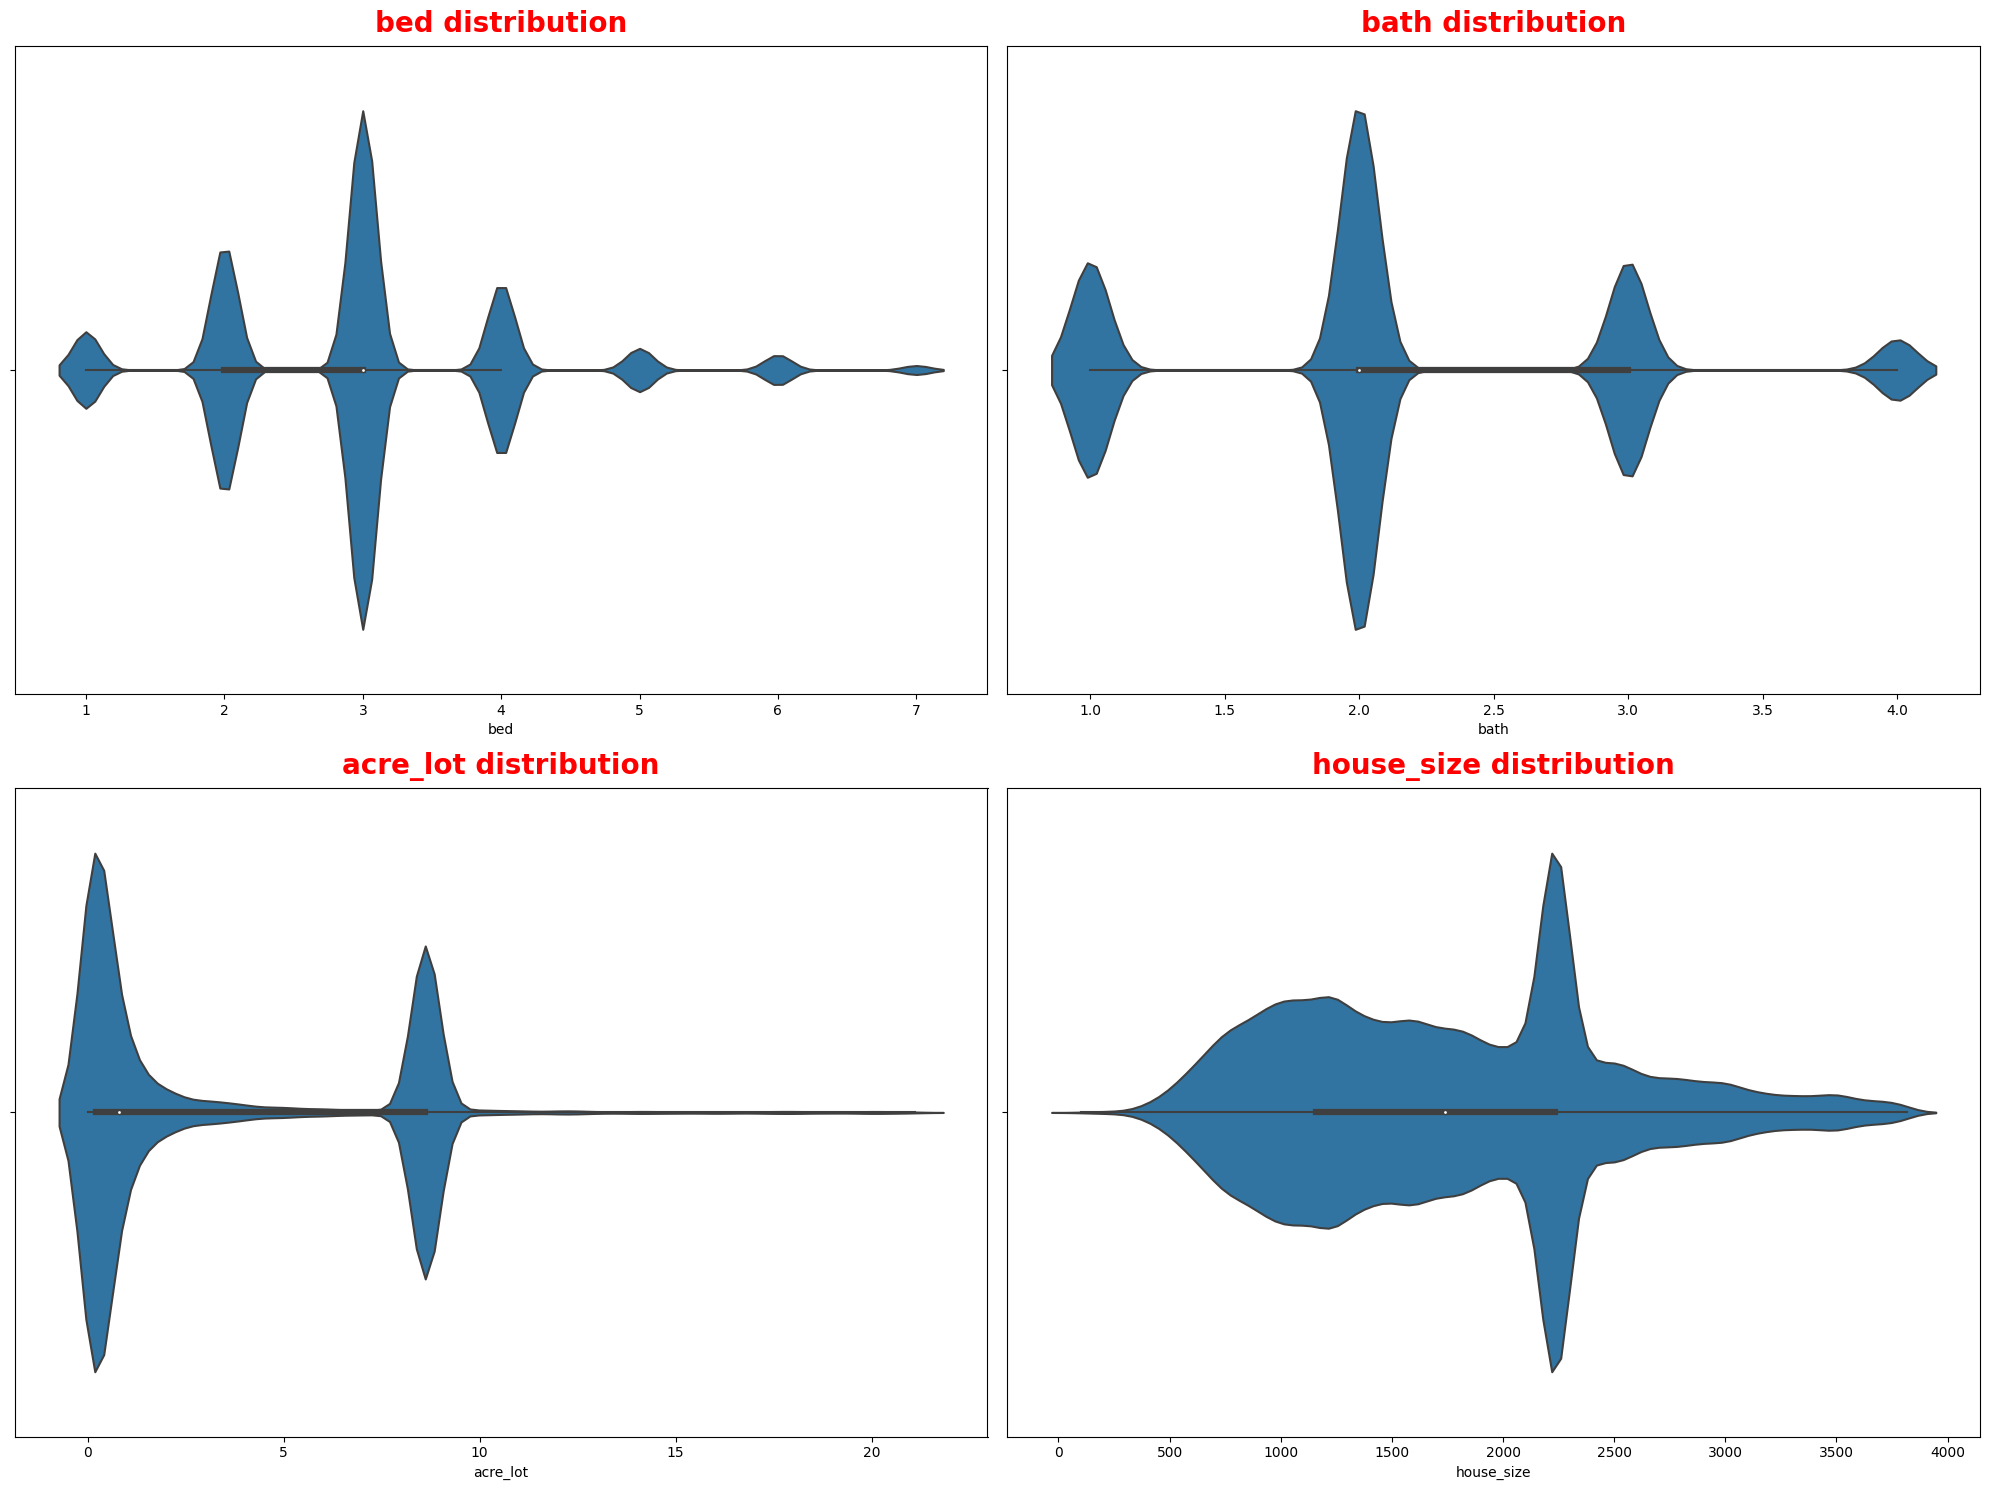

In [29]:

fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(20,15))
axs=axs.ravel()
for i,var in enumerate(num_var):
  ax=sns.violinplot(data=df,x=var,ax=axs[i])
  axs[i].set_title(f"{var} distribution",pad=10,fontweight='bold',fontsize=20,color='r')
fig.tight_layout()
plt.show()

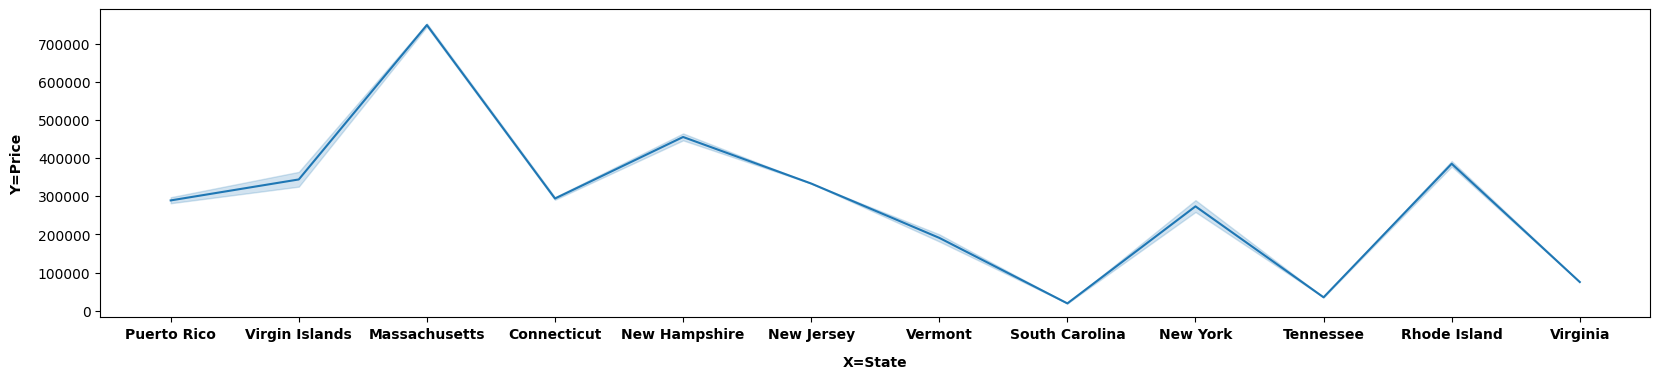

In [30]:
plt.figure(figsize=(20,4))
sns.lineplot(data=df,x=df['state'],y='price')
plt.xticks(fontweight='bold')
plt.xlabel("X=State",labelpad=10,fontweight='bold')
plt.ylabel("Y=Price",labelpad=10,fontweight='bold')
plt.show()

In [31]:
cat_var

['status', 'state']

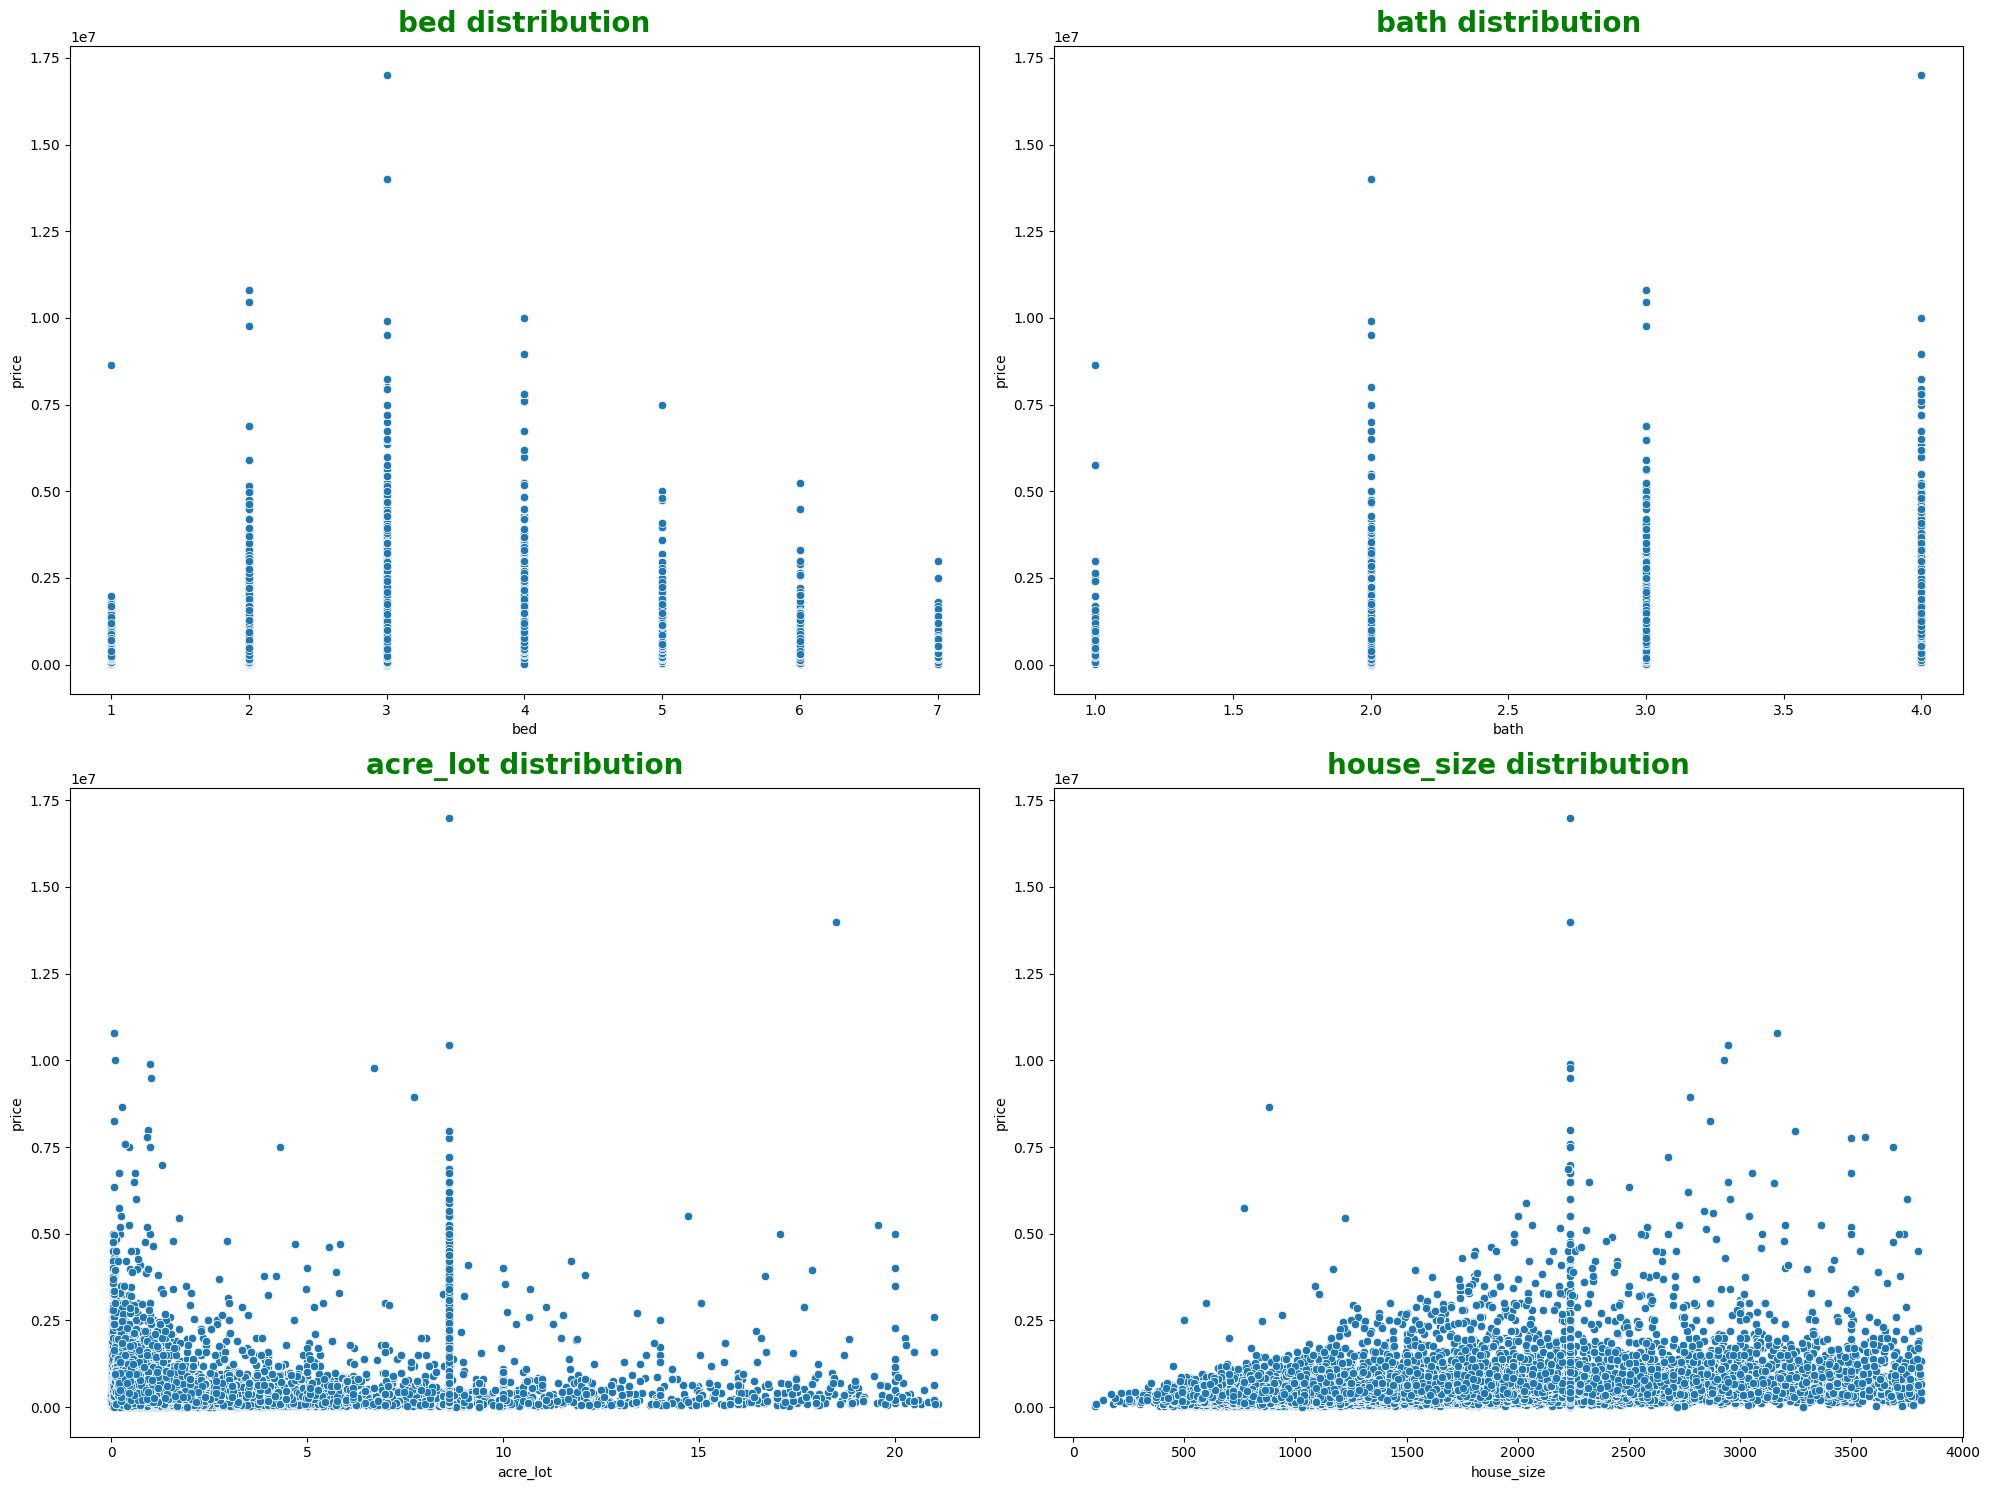

In [32]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(20,15))
axs=axs.ravel()
for i,var in enumerate(num_var):
  ax=sns.scatterplot(data=df,x=var,y='price',ax=axs[i])
  axs[i].set_title(f"{var} distribution",pad=10,fontweight='bold',fontsize=20,color='g')

fig.tight_layout()
plt.show()